In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Car:
    def __init__(self, car_id, position, speed, max_velocity):
        self.car_id=car_id
        self.position=position
        self.speed=speed
        self.max_velocity=max_velocity

    def accelerate(self):
        if self.speed<self.max_velocity:
            self.speed+=1

    def decelerate(self, headway_distance):
        if self.speed>headway_distance:
            self.speed=headway_distance #reduce speed equivalent only to headway distance (delta_t=1)

    def random_brake(self, randomization):
        if np.random.random()<randomization and self.speed>0:
            self.speed-=1

In [3]:
class Road:
    def __init__(self, length, max_velocity, randomization, production_prob):
        self.length=length #length of road
        self.max_velocity=max_velocity
        self.randomization=randomization
        self.next_car_id=1 #Initialize the next available ID
        self.production_prob=production_prob #Probability of produce of cars
        self.cars=[] #positions of cars???? To verify

    def headway_distance(self, car):
        next_car_position=min((v.position for v in self.cars if v.position>car.position), default=self.length)
        return next_car_position-car.position-1

    def update(self):
        new_cars=[]
        for car in self.cars:
            headway_distance = self.headway_distance(car) 
            car.accelerate()
            car.decelerate(headway_distance)
            new_position=(car.position+car.speed)%self.length #Change this to evaporate tha cars
            if new_position != self.length-1:
                    car.position=new_position
                    new_cars.append(car)
        self.cars=new_cars

        #Introduce new cars at one end based on production probability
        if np.random.rand()<self.production_prob:
            new_car=Car(self.next_car_id, 0, np.random.randint(1, self.max_velocity+1), self.max_velocity)
            self.cars.append(new_car)
            self.next_car_id+=1 #increment the next available car ID
            

    def visualize(self): #separate
        road_state=np.zeros(self.length) #make 2D array
        for car in self.cars:
            road_state[car.position]=1
        plt.imshow(road_state.reshape(1,-1), cmap="binary", aspect="auto")
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.title('Road Visualization')
        plt.xlabel('Position')
        plt.show()

In [4]:
#Example Use
length=25
max_velocity = 5
randomization=0.3
production_prob=0.95
road=Road(length, max_velocity, randomization, production_prob)

Time step: 1


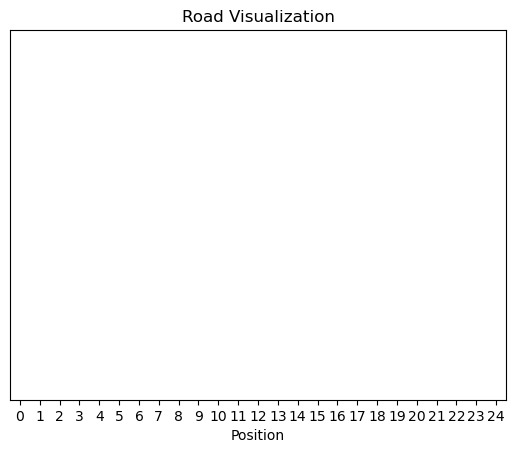

Cars:
ID: 1, Position: 0, Speed: 5

Time step: 2


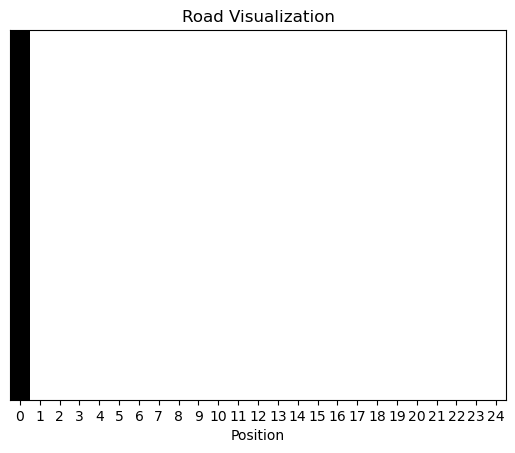

Cars:
ID: 1, Position: 5, Speed: 5
ID: 2, Position: 0, Speed: 5

Time step: 3


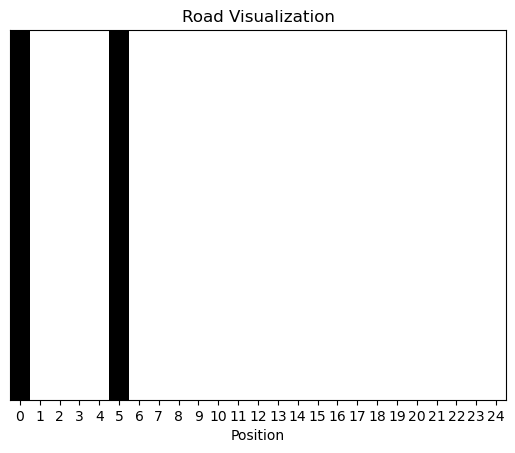

Cars:
ID: 1, Position: 10, Speed: 5
ID: 2, Position: 5, Speed: 5
ID: 3, Position: 0, Speed: 5

Time step: 4


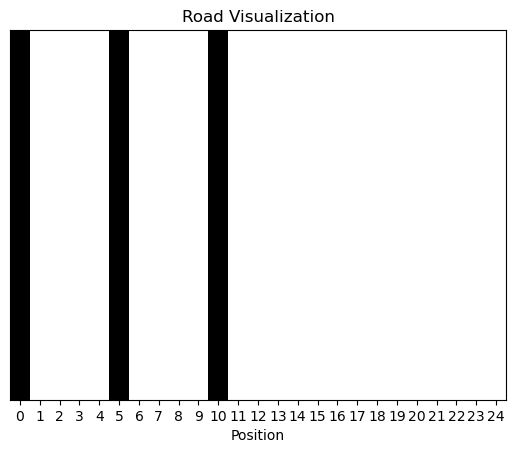

Cars:
ID: 1, Position: 15, Speed: 5
ID: 2, Position: 10, Speed: 5
ID: 3, Position: 5, Speed: 5
ID: 4, Position: 0, Speed: 3

Time step: 5


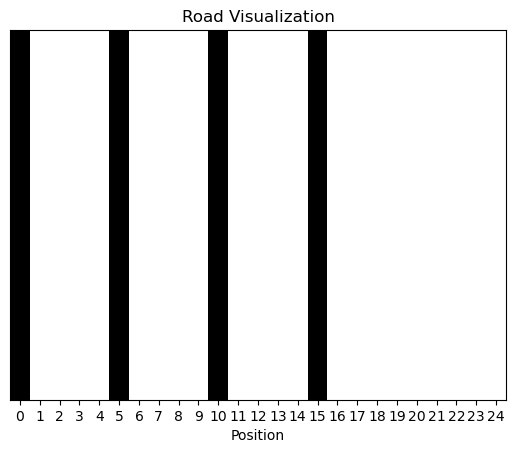

Cars:
ID: 1, Position: 20, Speed: 5
ID: 2, Position: 15, Speed: 5
ID: 3, Position: 10, Speed: 5
ID: 4, Position: 4, Speed: 4
ID: 5, Position: 0, Speed: 2

Time step: 6


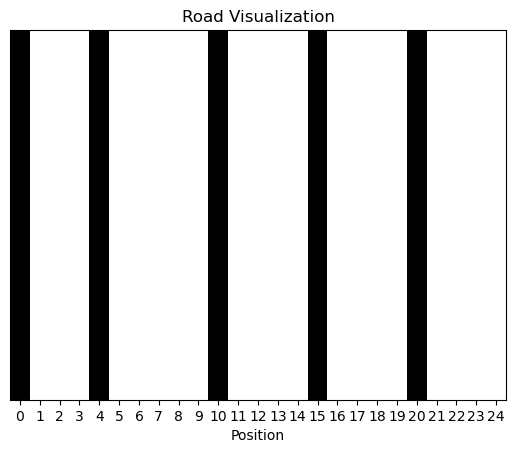

Cars:
ID: 2, Position: 19, Speed: 4
ID: 3, Position: 15, Speed: 5
ID: 4, Position: 9, Speed: 5
ID: 5, Position: 3, Speed: 3
ID: 6, Position: 0, Speed: 5

Time step: 7


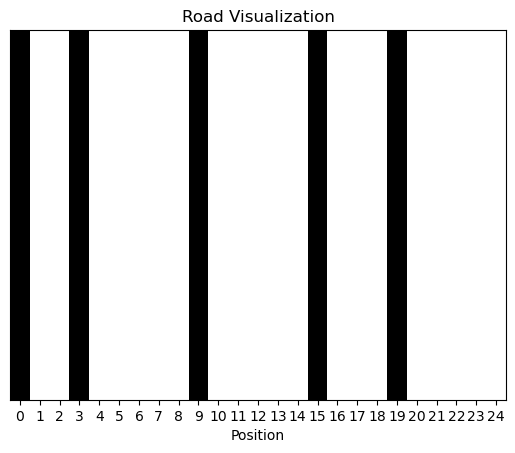

Cars:
ID: 3, Position: 18, Speed: 3
ID: 4, Position: 14, Speed: 5
ID: 5, Position: 7, Speed: 4
ID: 6, Position: 5, Speed: 5
ID: 7, Position: 0, Speed: 1

Time step: 8


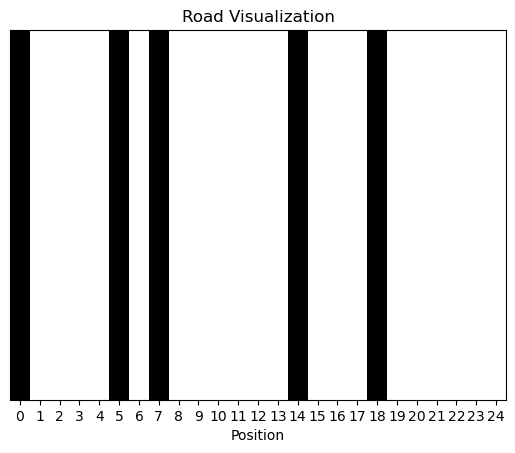

Cars:
ID: 3, Position: 22, Speed: 4
ID: 4, Position: 19, Speed: 5
ID: 5, Position: 12, Speed: 5
ID: 6, Position: 10, Speed: 5
ID: 7, Position: 2, Speed: 2

Time step: 9


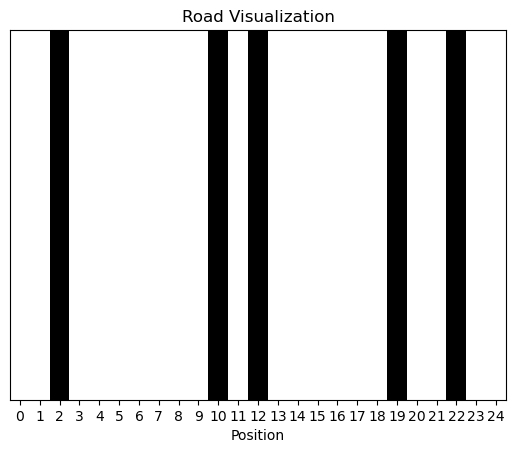

Cars:
ID: 4, Position: 21, Speed: 2
ID: 5, Position: 17, Speed: 5
ID: 6, Position: 15, Speed: 5
ID: 7, Position: 5, Speed: 3
ID: 8, Position: 0, Speed: 2

Time step: 10


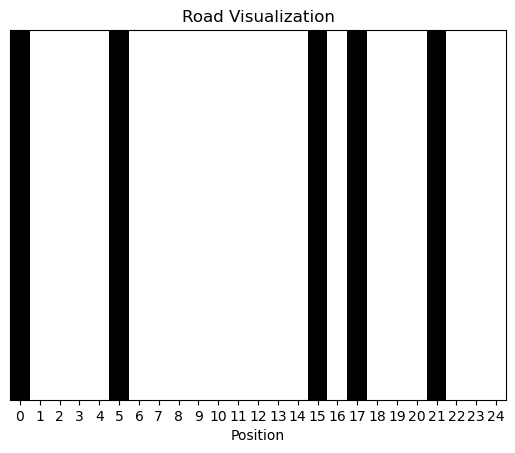

Cars:
ID: 5, Position: 20, Speed: 3
ID: 6, Position: 19, Speed: 4
ID: 7, Position: 9, Speed: 4
ID: 8, Position: 3, Speed: 3
ID: 9, Position: 0, Speed: 2

Time step: 11


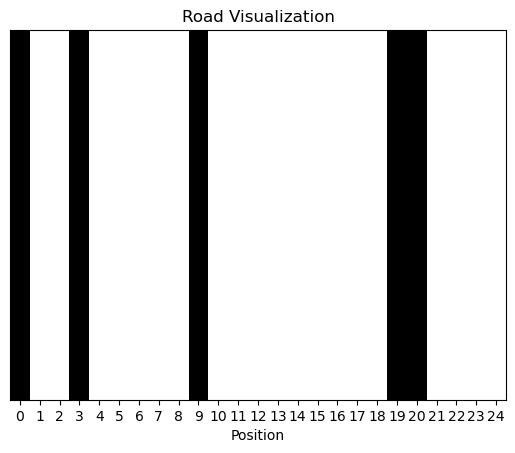

Cars:
ID: 6, Position: 19, Speed: 0
ID: 7, Position: 14, Speed: 5
ID: 8, Position: 7, Speed: 4
ID: 9, Position: 3, Speed: 3
ID: 10, Position: 0, Speed: 2

Time step: 12


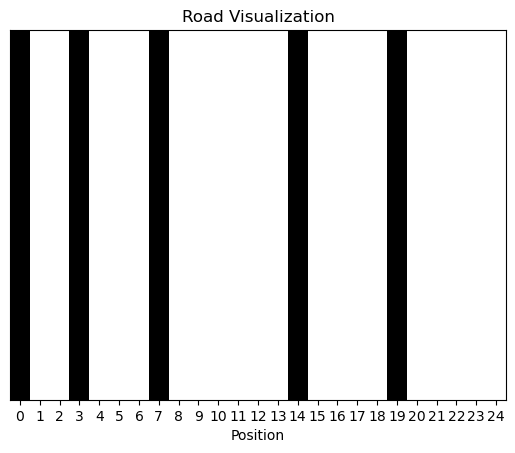

Cars:
ID: 6, Position: 20, Speed: 1
ID: 7, Position: 19, Speed: 5
ID: 8, Position: 12, Speed: 5
ID: 9, Position: 7, Speed: 4
ID: 10, Position: 3, Speed: 3
ID: 11, Position: 0, Speed: 2

Time step: 13


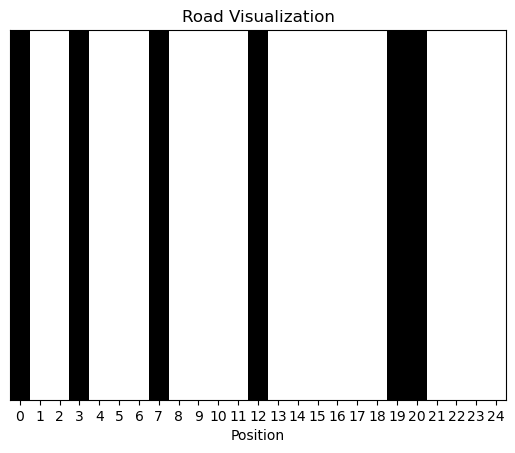

Cars:
ID: 6, Position: 22, Speed: 2
ID: 7, Position: 21, Speed: 2
ID: 8, Position: 17, Speed: 5
ID: 9, Position: 12, Speed: 5
ID: 10, Position: 7, Speed: 4
ID: 11, Position: 3, Speed: 3
ID: 12, Position: 0, Speed: 4

Time step: 14


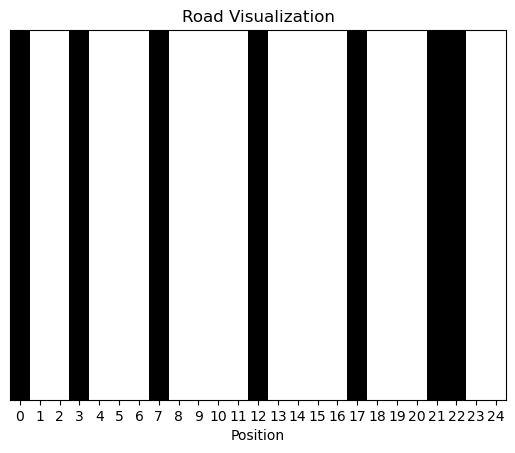

Cars:
ID: 7, Position: 21, Speed: 0
ID: 8, Position: 20, Speed: 3
ID: 9, Position: 17, Speed: 5
ID: 10, Position: 12, Speed: 5
ID: 11, Position: 7, Speed: 4
ID: 12, Position: 5, Speed: 5
ID: 13, Position: 0, Speed: 3

Time step: 15


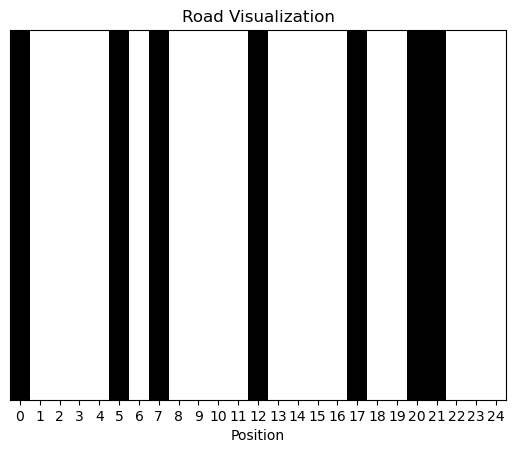

Cars:
ID: 7, Position: 22, Speed: 1
ID: 8, Position: 21, Speed: 1
ID: 9, Position: 20, Speed: 3
ID: 10, Position: 17, Speed: 5
ID: 11, Position: 12, Speed: 5
ID: 12, Position: 10, Speed: 5
ID: 13, Position: 4, Speed: 4
ID: 14, Position: 0, Speed: 4

Time step: 16


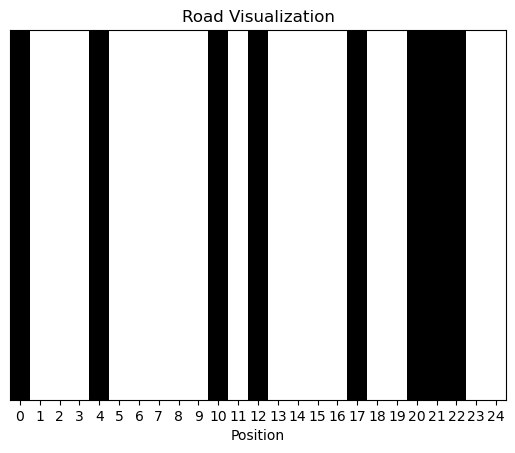

Cars:
ID: 8, Position: 21, Speed: 0
ID: 9, Position: 20, Speed: 0
ID: 10, Position: 19, Speed: 2
ID: 11, Position: 17, Speed: 5
ID: 12, Position: 15, Speed: 5
ID: 13, Position: 9, Speed: 5
ID: 14, Position: 5, Speed: 5
ID: 15, Position: 0, Speed: 4

Time step: 17


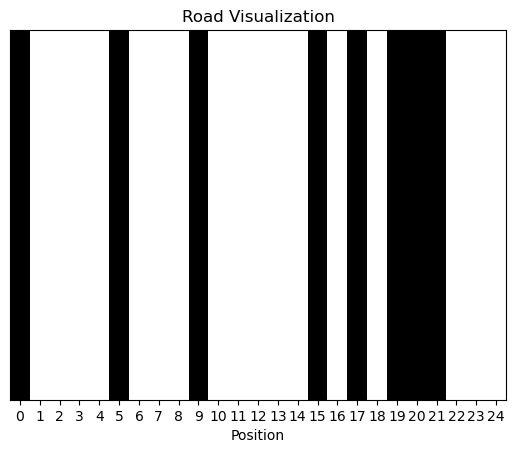

Cars:
ID: 8, Position: 22, Speed: 1
ID: 9, Position: 21, Speed: 1
ID: 10, Position: 20, Speed: 1
ID: 11, Position: 19, Speed: 2
ID: 12, Position: 18, Speed: 3
ID: 13, Position: 14, Speed: 5
ID: 14, Position: 10, Speed: 5
ID: 15, Position: 5, Speed: 5
ID: 16, Position: 0, Speed: 5

Time step: 18


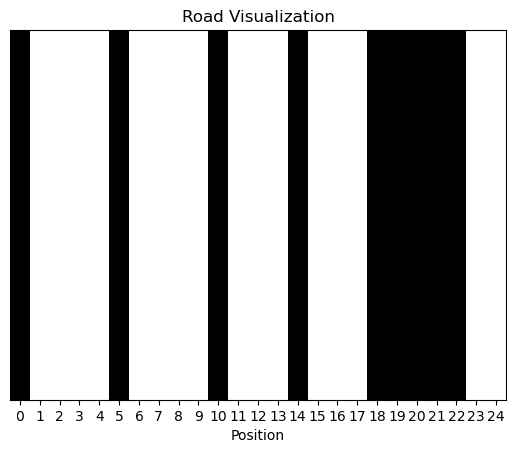

Cars:
ID: 9, Position: 21, Speed: 0
ID: 10, Position: 20, Speed: 0
ID: 11, Position: 19, Speed: 0
ID: 12, Position: 18, Speed: 0
ID: 13, Position: 17, Speed: 3
ID: 14, Position: 15, Speed: 5
ID: 15, Position: 10, Speed: 5
ID: 16, Position: 5, Speed: 5
ID: 17, Position: 0, Speed: 2

Time step: 19


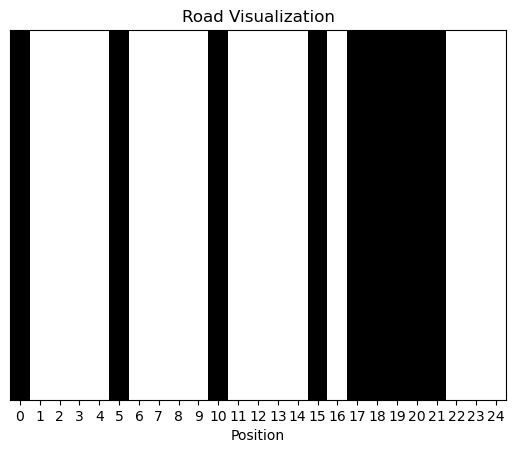

Cars:
ID: 9, Position: 22, Speed: 1
ID: 10, Position: 21, Speed: 1
ID: 11, Position: 20, Speed: 1
ID: 12, Position: 19, Speed: 1
ID: 13, Position: 18, Speed: 1
ID: 14, Position: 17, Speed: 2
ID: 15, Position: 15, Speed: 5
ID: 16, Position: 10, Speed: 5
ID: 17, Position: 3, Speed: 3

Time step: 20


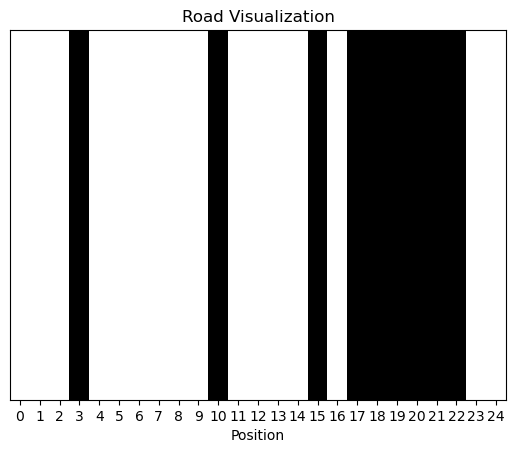

Cars:
ID: 10, Position: 21, Speed: 0
ID: 11, Position: 20, Speed: 0
ID: 12, Position: 19, Speed: 0
ID: 13, Position: 18, Speed: 0
ID: 14, Position: 17, Speed: 0
ID: 15, Position: 16, Speed: 1
ID: 16, Position: 15, Speed: 5
ID: 17, Position: 7, Speed: 4
ID: 18, Position: 0, Speed: 5



In [5]:
#Iterate over 20 timesteps
for i in range(20):
    print("Time step:", i+1)
    road.visualize()
    road.update()


    #Access information of each vehicle
    print("Cars:")
    for car in road.cars:
        print(f"ID: {car.car_id}, Position: {car.position}, Speed: {car.speed}")

    print()